
* **Data have 1000 observations and 7 variables**
* **Currency : dollar($)**


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
Car_insurance_data = pd.read_csv(r"C:\Users\karab\Downloads\car_insurance_premium_dataset.csv")
data = Car_insurance_data.copy()
data.head()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
0,56,32,4,17,2002,23,488.35
1,46,19,0,21,2025,0,486.15
2,32,11,4,15,2020,5,497.55
3,60,0,4,19,1991,34,498.35
4,25,7,0,13,2005,20,495.55


In [121]:
# Check if the data contain null values:
if np.count_nonzero(data.isnull())==0:
    print('Dataset has no missing observations'f"\n")
    
data.info()

Dataset has no missing observations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Driver Age                 1000 non-null   int64  
 1   Driver Experience          1000 non-null   int64  
 2   Previous Accidents         1000 non-null   int64  
 3   Annual Mileage (x1000 km)  1000 non-null   int64  
 4   Car Manufacturing Year     1000 non-null   int64  
 5   Car Age                    1000 non-null   int64  
 6   Insurance Premium ($)      1000 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 54.8 KB


In [13]:
data.describe()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.575000,14.759000,2.5680,17.933000,2007.637000,17.363000,493.742250
std,13.765677,10.544292,1.6989,4.410665,10.363331,10.363331,5.909689
min,18.000000,0.000000,0.0000,11.000000,1990.000000,0.000000,477.050000
25%,30.000000,6.000000,1.0000,14.000000,1999.000000,8.000000,489.487500
50%,42.000000,13.000000,3.0000,18.000000,2008.000000,17.000000,493.950000
75%,53.000000,23.000000,4.0000,22.000000,2017.000000,26.000000,498.312500
max,65.000000,40.000000,5.0000,25.000000,2025.000000,35.000000,508.150000


In [21]:
columns = [column for column in data.columns]
data[columns].corr()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
Driver Age,1.000000,0.607890,0.031819,0.056822,0.008187,-0.008187,-0.776848
Driver Experience,0.607890,1.000000,0.020837,-0.014424,-0.038194,0.038194,-0.803323
Previous Accidents,0.031819,0.020837,1.000000,0.007088,-0.030123,0.030123,0.410786
Annual Mileage (x1000 km),0.056822,-0.014424,0.007088,1.000000,-0.002898,0.002898,0.022131
Car Manufacturing Year,0.008187,-0.038194,-0.030123,-0.002898,1.000000,-1.000000,-0.171829
Car Age,-0.008187,0.038194,0.030123,0.002898,-1.000000,1.000000,0.171829
Insurance Premium ($),-0.776848,-0.803323,0.410786,0.022131,-0.171829,0.171829,1.000000


* **A positive relationship between driver's age and experience**
* **Strong negative relationship between driver's age and insurance premium, driver experience and insurance premium**

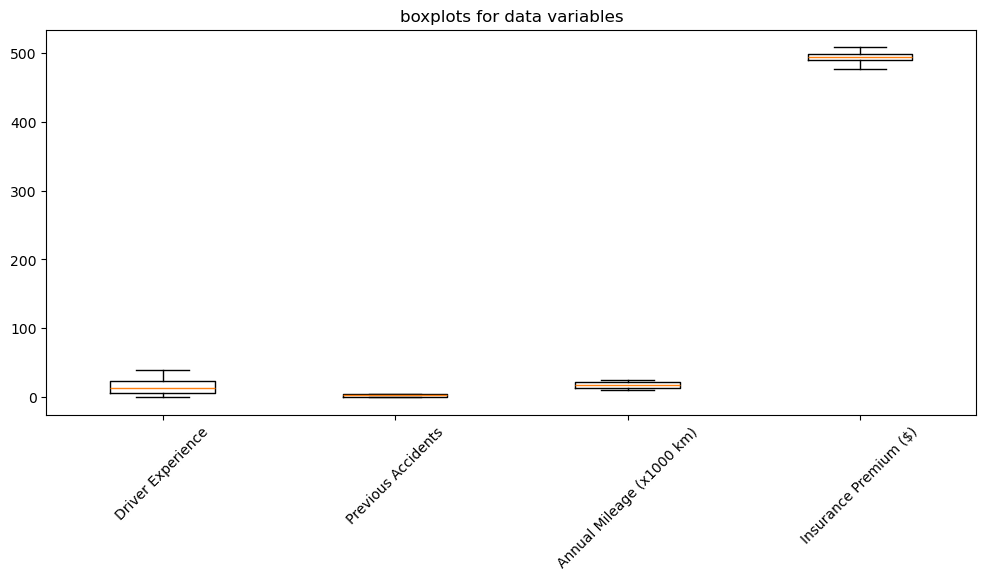

In [89]:
# Checking outliers
columns_to_plot = ['Driver Experience', 'Previous Accidents', 'Annual Mileage (x1000 km)', 'Insurance Premium ($)']
data_to_plot = [data[column] for column in columns_to_plot]

plt.figure( figsize=(12,5))
plt.boxplot( data_to_plot)
plt.title( "boxplots for data variables")
plt.xticks( [1,2,3,4], columns_to_plot, rotation=45)
plt.show()

In [127]:
# The data has no outliers

In [133]:
# Group age by bins
data['Grouped_age'] =[(i//10)*10 for i in data['Driver Age']]


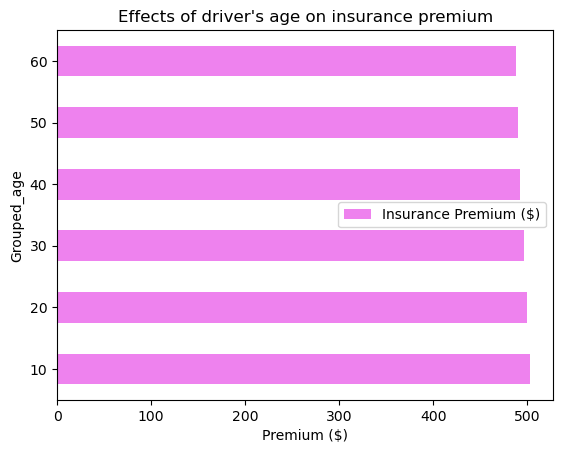

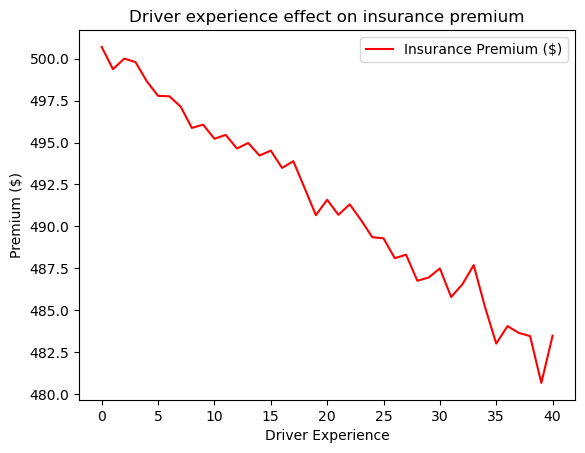

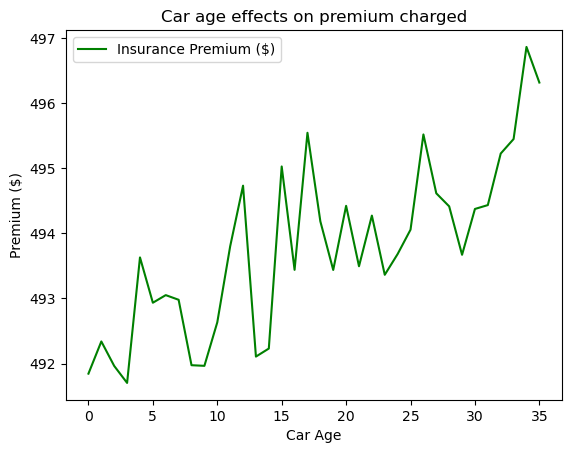

In [137]:
data[['Grouped_age','Insurance Premium ($)']].groupby('Grouped_age').mean().plot(kind='barh',title="Effects of driver's age on insurance premium",
                                                                                 color='violet')
plt.xlabel('Premium ($)')

# Experience premium relationship
data[['Driver Experience','Insurance Premium ($)']].groupby('Driver Experience').mean().plot(kind='line',
                                            title='Driver experience effect on insurance premium',color='r')
plt.ylabel('Premium ($)')

# effect by Age of car

data[['Car Age','Insurance Premium ($)']].groupby('Car Age').mean().plot(kind='line',title='Car age effects on premium charged',color='green')
plt.ylabel('Premium ($)')
plt.show()



In [143]:
# Average Premium by client accident history
data[['Insurance Premium ($)','Previous Accidents']].groupby('Previous Accidents').mean().sort_values(
    ascending=True,by='Previous Accidents').reset_index()


,Previous Accidents,Insurance Premium ($)
0,0,489.984091
1,1,491.954094
2,2,492.269444
3,3,494.535676
4,4,495.670739
5,5,497.332941


# Summary

* On average ,young individuals pay higher insurance premium than older people
* The higher the level of driving experience individuals have, the less the premium they are likely to pay
* The older the car, the higher the insurance premium 
* Many prior accidents lead to higher insurance premium charged